In [2]:
import numpy as np

In [6]:
 rand = np.random.RandomState(1)

In [7]:
rand

RandomState(MT19937) at 0x1422EFE9540

In [8]:
rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])

array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969,  0.00865408])

In [20]:
l = [1,2,3]
k = ["one","two","three"]
r = zip(l,k)

In [21]:
t = set(r)
print(t)

{(1, 'one'), (3, 'three'), (2, 'two')}


In [28]:
int(0.3!=0.0)

1

In [74]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return z
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, -1) 

In [75]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True) 

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

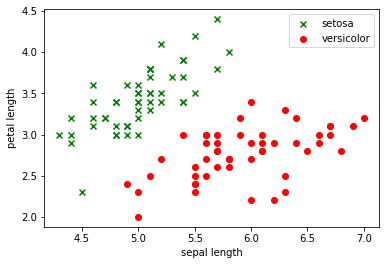

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

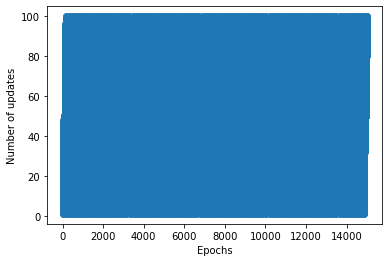

In [87]:
per = Perceptron(learning_rate=0.01, n_iter=100, random_state=4)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show() 

In [89]:
per.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])